In [66]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [124]:
def flatten_list(list):
    return [item for sublist in list for item in sublist]

In [138]:
df = pd.read_csv('netflix_titles.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [139]:
df['type'].fillna('Missing')
df['title'].fillna('Missing')
df['director'].fillna('Missing')

0                 Missing
1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
              ...        
7782          Josef Fares
7783          Mozez Singh
7784              Missing
7785              Missing
7786             Sam Dunn
Name: director, Length: 7787, dtype: object

In [140]:
df.type.describe()

count      7787
unique        2
top       Movie
freq       5377
Name: type, dtype: object

In [141]:
type_counts = df['type'].value_counts()
type_counts

Movie      5377
TV Show    2410
Name: type, dtype: int64

<AxesSubplot:>

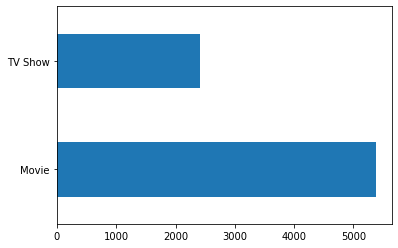

In [34]:
type_counts.plot(kind='barh', rot=0)

In [142]:
df.director.describe()

count                       5398
unique                      4049
top       Raúl Campos, Jan Suter
freq                          18
Name: director, dtype: object

In [143]:
director_counts = df['director'].value_counts()
director_counts

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Kyle Patrick Alvarez       1
James Haslam               1
Byun Hyuk                  1
Sooni Taraporevala         1
Adam Wingard               1
Name: director, Length: 4049, dtype: int64

<AxesSubplot:>

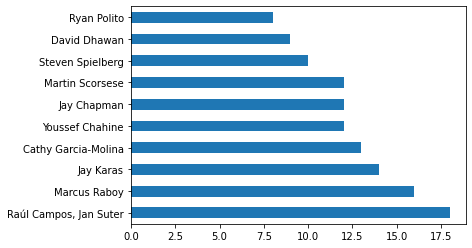

In [41]:
director_counts[:10].plot(kind='barh', rot=0)

Let's see who's in the most titles.

In [144]:
ccast = Series(flatten_list([x.split(', ') for x in df.cast.dropna()]))
ccast.describe()

count           55955
unique          32881
top       Anupam Kher
freq               42
dtype: object

In [145]:
df.country.describe()

count              7280
unique              681
top       United States
freq               2555
Name: country, dtype: object

In [146]:
country_counts = df['country'].value_counts()
country_counts

United States                                                  2555
India                                                           923
United Kingdom                                                  397
Japan                                                           226
South Korea                                                     183
                                                               ... 
France, Belgium, Luxembourg, Romania, Canada, United States       1
Norway, United States                                             1
Brazil, India, China, United States                               1
Argentina, France                                                 1
Denmark, Singapore, Canada, United States                         1
Name: country, Length: 681, dtype: int64

Looks like we have a couple of titles where countries collaborated, that are bunched together as comma seperated lists. Let's clean that.

In [147]:
countries_clean = Series(flatten_list([x.split(', ') for x in df.country.dropna()]))
countries_clean.describe()

count              9063
unique              121
top       United States
freq               3296
dtype: object

Looks like a couple thousand entires were bunched up entries were bunched up. Let's see if it made a difference.

In [148]:
clean_country_counts = countries_clean.value_counts()
clean_country_counts

United States         3296
India                  990
United Kingdom         722
Canada                 412
France                 349
                      ... 
Somalia                  1
Sudan                    1
Sri Lanka                1
Dominican Republic       1
Mauritius                1
Length: 121, dtype: int64

<AxesSubplot:>

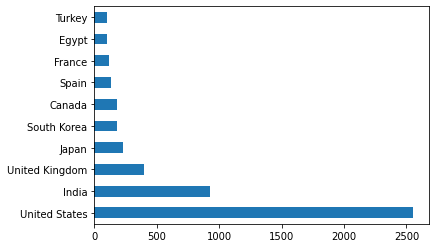

In [149]:
country_counts[:10].plot(kind='barh', rot=0)

<AxesSubplot:>

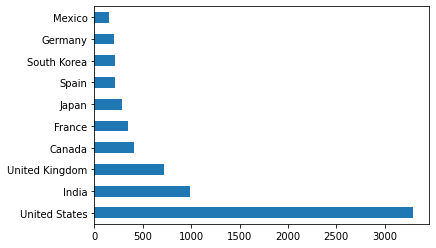

In [150]:
clean_country_counts[:10].plot(kind='barh', rot=0)

We can see the top 10s are significantly different. Countries like Canada and France jump ahead spots, while Germany and Mexico manage to make it into the top 10.

In [84]:
data.release_year.describe()

count    7787.000000
mean     2013.932580
std         8.757395
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

Interesting, half of Netflix titles were released after 2017.

In [43]:
release_year_counts = data['release_year'].value_counts()
release_year_counts

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1959       1
1966       1
1925       1
1964       1
1947       1
Name: release_year, Length: 73, dtype: int64

<AxesSubplot:>

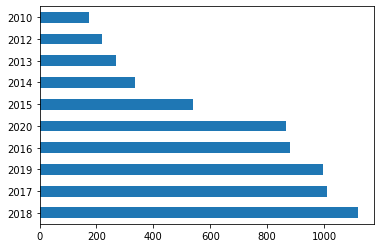

In [44]:
release_year_counts[:10].plot(kind='barh', rot=0)

Let's check the bottom 10.

<AxesSubplot:>

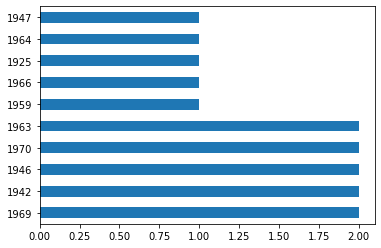

In [87]:
release_year_counts[-10:].plot(kind='barh', rot=0)

In [55]:
rating_counts = data['rating'].value_counts()
rating_counts

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [90]:
data.rating.describe()

count      7780
unique       14
top       TV-MA
freq       2863
Name: rating, dtype: object

<AxesSubplot:>

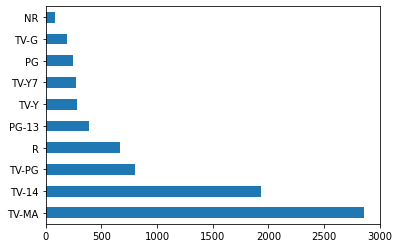

In [56]:
rating_counts[:10].plot(kind='barh', rot=0)

In [132]:
listed_in_clean = Series(flatten_list([x.split(', ') for x in data.listed_in.dropna()]))
listed_in_counts = listed_in_clean.value_counts()
listed_in_counts[:10]

International Movies        2437
Dramas                      2106
Comedies                    1471
International TV Shows      1199
Documentaries                786
Action & Adventure           721
TV Dramas                    704
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
dtype: int64

In [117]:
listed_in_clean.describe()

count                    17071
unique                      42
top       International Movies
freq                      2437
dtype: object

<AxesSubplot:>

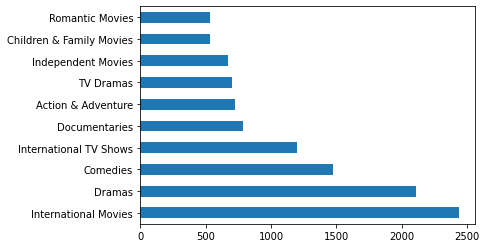

In [133]:
listed_in_counts[:10].plot(kind='barh', rot=0)

What are the least common listings on Netflix?

<AxesSubplot:>

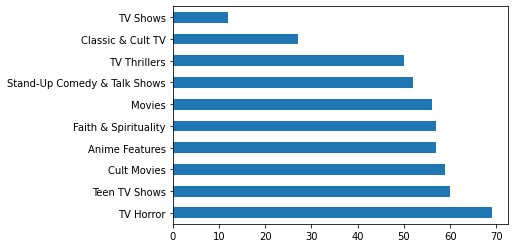

In [134]:
listed_in_counts[-10:].plot(kind='barh', rot=0)

Let's look at the 10 oldest titles.

In [136]:
data.sort_values(by="release_year")[:10]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4867,s4868,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
6117,s6118,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
4960,s4961,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
7679,s7680,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
7342,s7343,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
7616,s7617,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
7268,s7269,Movie,Tunisian Victory,"Frank Capra, John Huston, Hugh Stewart, Roy Bo...",Burgess Meredith,"United States, United Kingdom","March 31, 2017",1944,TV-14,76 min,"Classic Movies, Documentaries",British and American troops join forces to lib...
6699,s6700,Movie,The Negro Soldier,Stuart Heisler,NaN,United States,"March 31, 2017",1944,TV-14,40 min,"Classic Movies, Documentaries",This documentary urged African Americans to en...
6657,s6658,Movie,The Memphis Belle: A Story of a\nFlying Fortress,William Wyler,NaN,United States,"March 31, 2017",1944,TV-PG,40 min,"Classic Movies, Documentaries",This documentary centers on the crew of the B-...
5371,s5372,Movie,San Pietro,John Huston,NaN,United States,"March 31, 2017",1945,TV-14,32 min,"Classic Movies, Documentaries","After the Allies invade Italy, the Liri Valley..."


In [137]:
data.sort_values(by="release_year")[-10:]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1864,s1865,TV Show,Dream Home Makeover,NaN,NaN,United States,"January 1, 2021",2021,TV-G,2 Seasons,Reality TV,Dreams come true for real families looking for...
2753,s2754,TV Show,History of Swear Words,NaN,Nicolas Cage,United States,"January 5, 2021",2021,TV-MA,1 Season,"Docuseries, TV Comedies","Nicolas Cage hosts this proudly profane, funny..."
5859,s5860,Movie,Stuck Apart,NaN,"Engin Günaydın, Haluk Bilginer, Binnur Kaya, Ö...",Turkey,"January 8, 2021",2021,TV-MA,97 min,"Comedies, Dramas, International Movies","Entrenched in a midlife crisis, Aziz seeks sol..."
1222,s1223,TV Show,Carmen Sandiego,NaN,"Gina Rodriguez, Finn Wolfhard, Abby Trott, Mic...",United States,"January 15, 2021",2021,TV-Y7,4 Seasons,"Kids' TV, TV Thrillers","A master thief who uses her skills for good, C..."
1514,s1515,Movie,"Crack: Cocaine, Corruption & Conspiracy",Stanley Nelson,NaN,United States,"January 11, 2021",2021,TV-MA,90 min,Documentaries,"A cheap, powerful drug emerges during a recess..."
4173,s4174,TV Show,Monarca,NaN,"Irene Azuela, Juan Manuel Bernal, Osvaldo Bena...",Mexico,"January 1, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Spanish-Language TV Sh...","After 20 years, Ana María returns to Mexico an..."
3822,s3823,TV Show,Lupin,NaN,"Omar Sy, Ludivine Sagnier, Clotilde Hesme, Nic...",United States,"January 8, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Inspired by the adventures of Arsène Lupin, ge..."
980,s981,TV Show,Bling Empire,NaN,NaN,NaN,"January 15, 2021",2021,TV-MA,1 Season,Reality TV,Follow LA's wildly wealthy Asian and Asian Ame...
1285,s1286,Movie,Charming,Ross Venokur,"Wilmer Valderrama, Demi Lovato, Sia, Nia Varda...","Canada, United States, Cayman Islands","January 8, 2021",2021,TV-Y7,85 min,"Children & Family Movies, Comedies","On the eve of his 21st birthday, an adored pri..."
4468,s4469,TV Show,Night Stalker: The Hunt for a Serial Killer,Tiller Russell,NaN,NaN,"January 13, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries",Beneath the sunlit glamour of 1985 LA lurks a ...


Some interesting data cleaning that we'll want to do here. Looks like some genres are split up between movies and TV, like Dramas vs TV Dramas.

In [64]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [74]:
data.type.describe()

count      7787
unique        2
top       Movie
freq       5377
Name: type, dtype: object

In [73]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')